## 1. The Goal of This Project is to predict The Efficeny of BOD , COD , TSS

## All Packages you need for this 

In [81]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import sklearn
import xlrd

# Pre Processing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Error Metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

#Cross Validation 
from sklearn.model_selection import GridSearchCV

## 2. Load The Data into a Pandas Frame

In [82]:
#For Excel file 
df= pd.read_excel('finaldata.xlsx')
df=df.iloc[:,:-1]


# 3. Perform Data Exploratory Analysis
##   Pandas Routine 


In [83]:
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,BOD_,COD_,TSS_
0,2018-03-01 00:00:00,influent,17.0,7.5,610.0,355.0,1460.0,310.0,98.0,150.0,75.0
1,17/1/2018,influent,14.5,7.8,530.0,275.0,1453.0,255.0,68.0,95.0,60.0
2,27/1/2018,influent,13.7,7.4,730.0,380.0,1813.0,320.0,70.0,110.0,65.0
3,2018-01-02 00:00:00,influent,14.0,6.9,675.0,385.0,1520.0,340.0,8.7,20.0,73.0
4,2018-08-02 00:00:00,influent,17.6,6.8,710.0,395.0,1593.0,350.0,78.0,100.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check For Missing Data 

In [84]:
print(df.isnull().sum().sort_values(ascending=False))

TSS      155
date     154
temp     154
PH       154
COD      154
BOD      154
TDS      154
BOD_     154
COD_     154
TSS_     154
stage      0
dtype: int64


### Drop Rows with None Values 

In [85]:
df=df.dropna()
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,BOD_,COD_,TSS_
0,2018-03-01 00:00:00,influent,17.0,7.50,610.0,355.0,1460.0,310.0,98.0,150.0,75.0
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,68.0,95.0,60.0
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,70.0,110.0,65.0
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,8.7,20.0,73.0
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,78.0,100.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
109,2020-05-07 00:00:00,influent,28.4,6.82,704.0,410.0,1315.0,372.0,32.0,62.0,70.0
110,2020-12-07 00:00:00,influent,25.5,6.93,737.0,310.0,1260.0,345.0,52.0,74.0,86.0
111,19/7/2020,influent,26.1,7.36,610.0,340.0,2330.0,278.0,42.0,72.0,58.0
112,19/8/2020,influent,28.9,7.27,650.0,321.0,1130.0,790.0,72.0,135.0,100.0


### Correct Index

In [86]:
df=df.reset_index(drop=True)
df=df[1:]
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,BOD_,COD_,TSS_
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,68.0,95.0,60.0
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,70.0,110.0,65.0
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,8.7,20.0,73.0
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,78.0,100.0,60.0
5,14/2/2018,influent,13.8,6.90,610.0,390.0,1221.0,345.0,88.0,110.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,influent,28.4,6.82,704.0,410.0,1315.0,372.0,32.0,62.0,70.0
109,2020-12-07 00:00:00,influent,25.5,6.93,737.0,310.0,1260.0,345.0,52.0,74.0,86.0
110,19/7/2020,influent,26.1,7.36,610.0,340.0,2330.0,278.0,42.0,72.0,58.0
111,19/8/2020,influent,28.9,7.27,650.0,321.0,1130.0,790.0,72.0,135.0,100.0


### Describe Your Data


In [87]:
df.describe()

,temp,PH,COD,BOD,TDS,TSS,BOD_,COD_,TSS_
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,22.740179,7.033214,671.285714,386.321429,1237.535714,341.428571,75.890179,126.035714,68.955357
std,4.820386,0.498770,149.533715,84.062527,326.834336,110.710621,26.334463,48.072379,22.186916
min,13.700000,3.670000,60.000000,130.000000,111.000000,93.000000,8.700000,20.000000,24.000000
25%,18.175000,6.800000,610.000000,337.000000,1032.500000,250.000000,63.000000,95.750000,54.750000
50%,23.550000,7.100000,690.000000,390.000000,1236.000000,345.000000,72.000000,120.000000,69.000000
75%,27.050000,7.280000,752.500000,430.000000,1432.000000,406.000000,88.250000,150.000000,83.500000
max,34.000000,8.630000,1040.000000,570.000000,2330.000000,790.000000,185.000000,360.000000,125.000000


In [88]:
df['stage'].values

array(['influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influe

> All the Column has the same Value  so we will drop it

#### Drop Specific Columns

In [89]:
df=df.drop(['stage'], 1)
df

,date,temp,PH,COD,BOD,TDS,TSS,BOD_,COD_,TSS_
1,17/1/2018,14.5,7.80,530.0,275.0,1453.0,255.0,68.0,95.0,60.0
2,27/1/2018,13.7,7.40,730.0,380.0,1813.0,320.0,70.0,110.0,65.0
3,2018-01-02 00:00:00,14.0,6.90,675.0,385.0,1520.0,340.0,8.7,20.0,73.0
4,2018-08-02 00:00:00,17.6,6.80,710.0,395.0,1593.0,350.0,78.0,100.0,60.0
5,14/2/2018,13.8,6.90,610.0,390.0,1221.0,345.0,88.0,110.0,75.0
...,...,...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,28.4,6.82,704.0,410.0,1315.0,372.0,32.0,62.0,70.0
109,2020-12-07 00:00:00,25.5,6.93,737.0,310.0,1260.0,345.0,52.0,74.0,86.0
110,19/7/2020,26.1,7.36,610.0,340.0,2330.0,278.0,42.0,72.0,58.0
111,19/8/2020,28.9,7.27,650.0,321.0,1130.0,790.0,72.0,135.0,100.0


## Seaborn Routine

### Heat Map

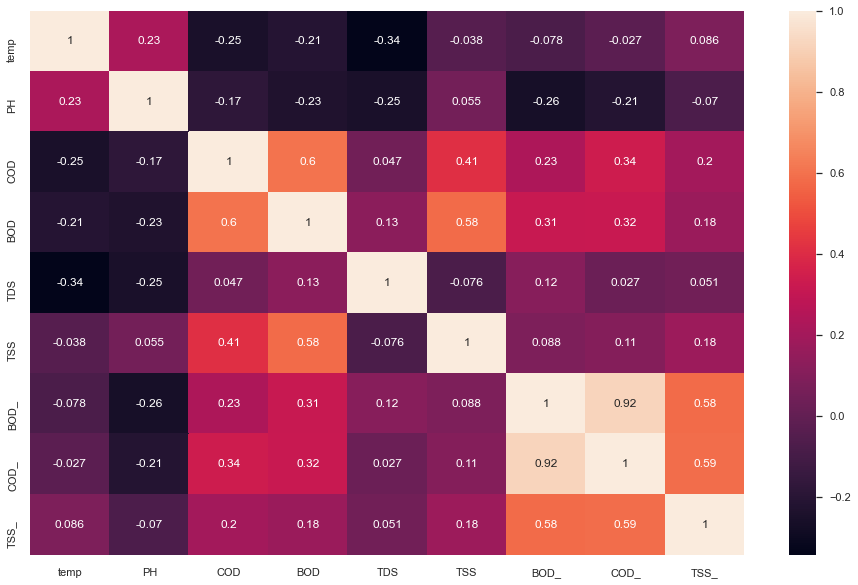

In [90]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()

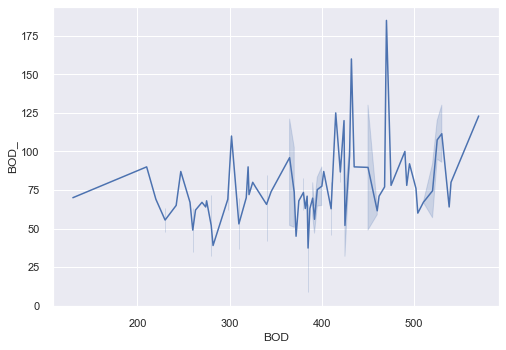

In [91]:
sns_plot = sns.lineplot(x='BOD', y='BOD_', data=df)


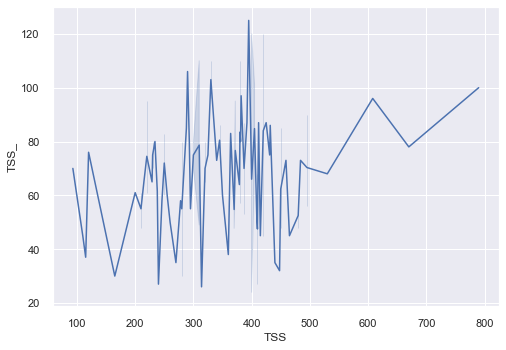

In [92]:
sns_plot = sns.lineplot(x='TSS', y='TSS_', data=df)


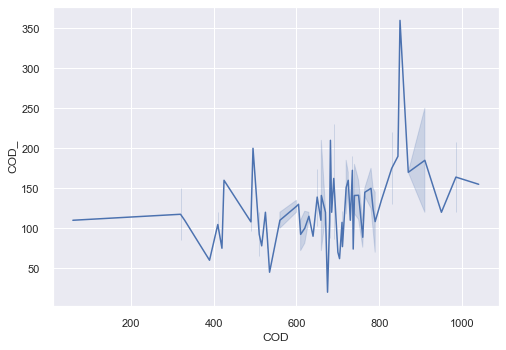

In [93]:
sns_plot = sns.lineplot(x='COD', y='COD_', data=df)

# For The Efficiency of TSS 

## Data Preprocessing


## Splitting Data 

In [94]:
TSSdf=df

In [95]:
y=TSSdf['TSS_']
X=TSSdf.drop(['TSS_','BOD_','COD_','date'],1)

In [96]:
X

,temp,PH,COD,BOD,TDS,TSS
1,14.5,7.80,530.0,275.0,1453.0,255.0
2,13.7,7.40,730.0,380.0,1813.0,320.0
3,14.0,6.90,675.0,385.0,1520.0,340.0
4,17.6,6.80,710.0,395.0,1593.0,350.0
5,13.8,6.90,610.0,390.0,1221.0,345.0
...,...,...,...,...,...,...
108,28.4,6.82,704.0,410.0,1315.0,372.0
109,25.5,6.93,737.0,310.0,1260.0,345.0
110,26.1,7.36,610.0,340.0,2330.0,278.0
111,28.9,7.27,650.0,321.0,1130.0,790.0


In [97]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1)

## Standardization

In [98]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

# 5. Training Process

In [99]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)

#### Error Evaluation

In [100]:
print(' Mean Squared Error :', mean_squared_error(y_test,pred2))
print(' Mean Absoulte Error :', mean_absolute_error(y_test,pred2))
print(' R2 Score :', r2_score(y_test,pred2))

 Mean Squared Error : 198.01705000000004
 Mean Absoulte Error : 11.433333333333332
 R2 Score : 0.3979211317567567


In [101]:
err=abs(y_test-pred2)
Preds=pd.DataFrame(pred2)
Actual=pd.DataFrame(y_test)

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual TSS','Predicted TSS', "Error"]
Result =Result.sort_values(by=['Actual TSS'])
Result.reset_index(inplace=True)
Result


,index,Actual TSS,Predicted TSS,Error
0,7,30.0,58.95,28.95
1,1,45.0,45.37,0.37
2,9,45.0,61.10,16.10
3,0,52.0,69.14,17.14
4,5,54.0,67.95,13.95
5,3,60.0,39.39,20.61
6,11,68.0,71.02,3.02
7,4,70.0,67.08,2.92
8,8,80.0,70.17,9.83
9,10,80.0,70.74,9.26


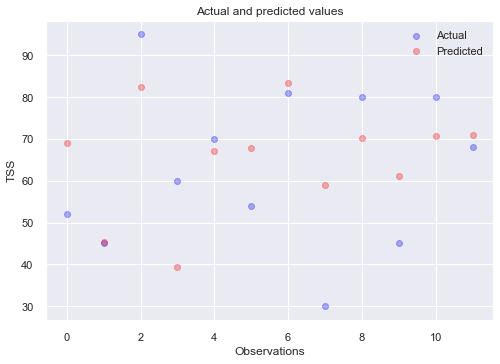

In [102]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
y_pred=pred2
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('TSS')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error ,r2_score
MSE= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
RMSE=mean_squared_error(y_test,y_pred)**0.5
AAD= np.sum(((y_pred-y_test)/y_pred)/len(y_test))*100
print('--------------------------------')
print('TSS Results')
print('MSE :', MSE)
print('R2 :',r2)
print('RMSE :', RMSE)
print('AAD% :',AAD)

--------------------------------
TSS Results
MSE : 198.01705000000004
R2 : 0.3979211317567567
RMSE : 14.071853111797324
AAD% : 2.467892261495526


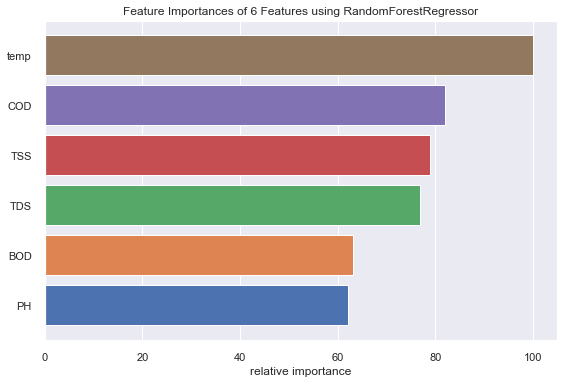

<AxesSubplot:title={'center':'Feature Importances of 6 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [104]:
from yellowbrick.model_selection import FeatureImportances
model=reg2
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

<AxesSubplot:>

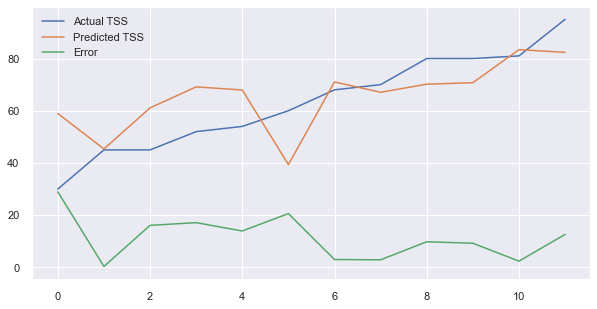

In [105]:
Result.plot(x=Result.index.name, y=['Actual TSS','Predicted TSS','Error'],figsize=(10,5), grid=True  )

In [106]:
df

,date,temp,PH,COD,BOD,TDS,TSS,BOD_,COD_,TSS_
1,17/1/2018,14.5,7.80,530.0,275.0,1453.0,255.0,68.0,95.0,60.0
2,27/1/2018,13.7,7.40,730.0,380.0,1813.0,320.0,70.0,110.0,65.0
3,2018-01-02 00:00:00,14.0,6.90,675.0,385.0,1520.0,340.0,8.7,20.0,73.0
4,2018-08-02 00:00:00,17.6,6.80,710.0,395.0,1593.0,350.0,78.0,100.0,60.0
5,14/2/2018,13.8,6.90,610.0,390.0,1221.0,345.0,88.0,110.0,75.0
...,...,...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,28.4,6.82,704.0,410.0,1315.0,372.0,32.0,62.0,70.0
109,2020-12-07 00:00:00,25.5,6.93,737.0,310.0,1260.0,345.0,52.0,74.0,86.0
110,19/7/2020,26.1,7.36,610.0,340.0,2330.0,278.0,42.0,72.0,58.0
111,19/8/2020,28.9,7.27,650.0,321.0,1130.0,790.0,72.0,135.0,100.0


# The Effiency of Bod 
## Data Preprocessing


## Splitting Data 

In [107]:
dfBod=df

In [108]:
y=dfBod['BOD_']
X=dfBod.drop(['TSS_','BOD_','COD_','date'],1)

In [109]:
y

1      68.0
2      70.0
3       8.7
4      78.0
5      88.0
       ... 
108    32.0
109    52.0
110    42.0
111    72.0
112    70.0
Name: BOD_, Length: 112, dtype: float64

In [110]:
X

,temp,PH,COD,BOD,TDS,TSS
1,14.5,7.80,530.0,275.0,1453.0,255.0
2,13.7,7.40,730.0,380.0,1813.0,320.0
3,14.0,6.90,675.0,385.0,1520.0,340.0
4,17.6,6.80,710.0,395.0,1593.0,350.0
5,13.8,6.90,610.0,390.0,1221.0,345.0
...,...,...,...,...,...,...
108,28.4,6.82,704.0,410.0,1315.0,372.0
109,25.5,6.93,737.0,310.0,1260.0,345.0
110,26.1,7.36,610.0,340.0,2330.0,278.0
111,28.9,7.27,650.0,321.0,1130.0,790.0


In [111]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1 ,random_state =890)

## Standardization

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

# 5. Training Process

In [113]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)

#### Error Evaluation

In [114]:
print(' Mean Squared Error :', mean_squared_error(y_test,pred2))
print(' Mean Absoulte Error :', mean_absolute_error(y_test,pred2))
print(' R2 Score :', r2_score(y_test,pred2))

 Mean Squared Error : 248.5715587500001
 Mean Absoulte Error : 10.733916666666667
 R2 Score : 0.1802893613025851


In [115]:
preds=pred2
err=abs(y_test-pred2)
Preds=pd.DataFrame(preds)
Actual=pd.DataFrame(y_test)

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual Efficency of Bod','Predicted Efficeny of Bod', "Error"]
Result =Result.sort_values(by=['Actual Efficency of Bod'])
Result.reset_index(inplace=True)
Result


,index,Actual Efficency of Bod,Predicted Efficeny of Bod,Error
0,5,47.0,70.554,23.554
1,2,63.0,66.310,3.310
2,11,63.0,65.640,2.640
3,8,64.0,65.450,1.450
4,0,65.0,62.150,2.850
5,7,67.0,69.640,2.640
6,10,68.0,58.290,9.710
7,3,72.0,72.630,0.630
8,6,76.0,113.180,37.180
9,9,80.0,83.750,3.750


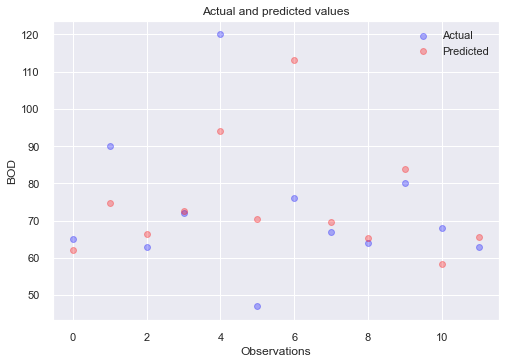

In [116]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
y_pred=pred2
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('BOD')
plt.legend()
plt.show()

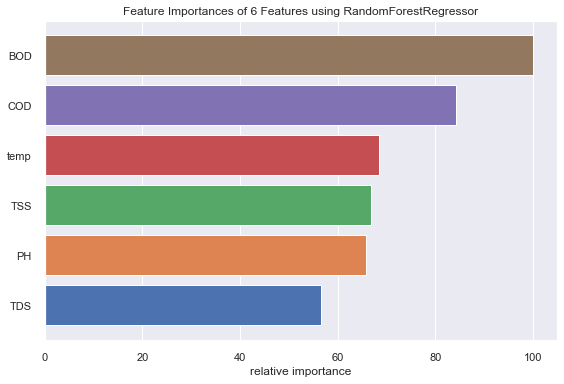

<AxesSubplot:title={'center':'Feature Importances of 6 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [117]:
from yellowbrick.model_selection import FeatureImportances
model=reg2
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

<AxesSubplot:>

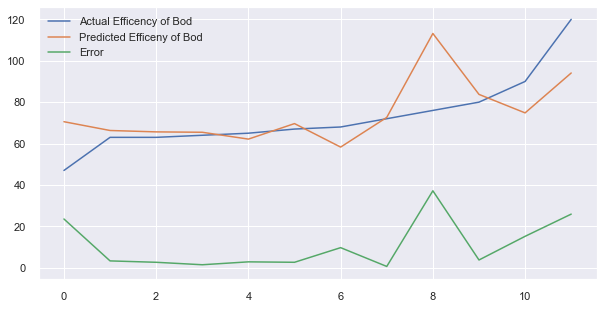

In [118]:
Result.plot(x=Result.index.name, y=['Actual Efficency of Bod','Predicted Efficeny of Bod','Error'],figsize=(10,5), grid=True  )

In [119]:
from sklearn.metrics import mean_squared_error ,r2_score
MSE= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
RMSE=mean_squared_error(y_test,y_pred)**0.5
AAD= np.sum(((y_pred-y_test)/y_pred)/len(y_test))*100
print('--------------------------------')
print('BOD Results')
print('MSE :', MSE)
print('R2 :',r2)
print('RMSE :', RMSE)
print('AAD% :',AAD)

--------------------------------
BOD Results
MSE : 248.5715587500001
R2 : 0.1802893613025851
RMSE : 15.766152312787039
AAD% : 1.4604131635886548


# The Effiency of Cod 
## Data Preprocessing


## Splitting Data 

In [120]:
dfcod=df

In [121]:
y=dfcod['COD_']
X=dfcod.drop(['TSS_','BOD_','COD_','date'],1)

In [122]:
y

1       95.0
2      110.0
3       20.0
4      100.0
5      110.0
       ...  
108     62.0
109     74.0
110     72.0
111    135.0
112    125.0
Name: COD_, Length: 112, dtype: float64

In [123]:
X

,temp,PH,COD,BOD,TDS,TSS
1,14.5,7.80,530.0,275.0,1453.0,255.0
2,13.7,7.40,730.0,380.0,1813.0,320.0
3,14.0,6.90,675.0,385.0,1520.0,340.0
4,17.6,6.80,710.0,395.0,1593.0,350.0
5,13.8,6.90,610.0,390.0,1221.0,345.0
...,...,...,...,...,...,...
108,28.4,6.82,704.0,410.0,1315.0,372.0
109,25.5,6.93,737.0,310.0,1260.0,345.0
110,26.1,7.36,610.0,340.0,2330.0,278.0
111,28.9,7.27,650.0,321.0,1130.0,790.0


In [129]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1  )

## Standardization

In [130]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

# 5. Training Process

In [131]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)

#### Error Evaluation

In [132]:
print(' Mean Squared Error :', mean_squared_error(y_test,pred2))
print(' Mean Absoulte Error :', mean_absolute_error(y_test,pred2))
print(' R2 Score :', r2_score(y_test,pred2))

 Mean Squared Error : 1873.1169333333335
 Mean Absoulte Error : 31.640000000000004
 R2 Score : 0.14518066419681874


In [133]:
preds=pred2
err=abs(y_test-pred2)
Preds=pd.DataFrame(preds)
Actual=pd.DataFrame(y_test)

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual Efficency of Cod','Predicted Efficeny of Cod', "Error"]
Result =Result.sort_values(by=['Actual Efficency of Cod'])
Result.reset_index(inplace=True)
Result


,index,Actual Efficency of Cod,Predicted Efficeny of Cod,Error
0,5,45.0,107.61,62.61
1,11,70.0,131.71,61.71
2,6,100.0,103.05,3.05
3,7,100.0,109.57,9.57
4,0,120.0,161.00,41.00
5,3,120.0,120.90,0.90
6,10,120.0,82.15,37.85
7,4,130.0,105.39,24.61
8,8,140.0,147.58,7.58
9,9,160.0,157.36,2.64


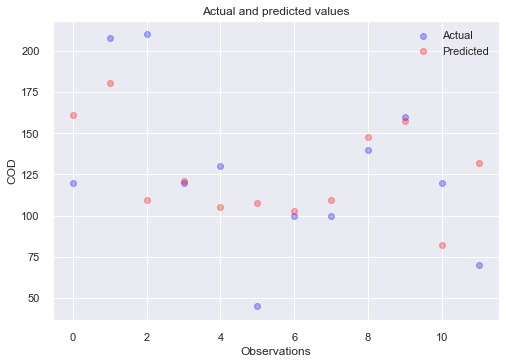

In [134]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
y_pred=pred2
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('COD')
plt.legend()
plt.show()

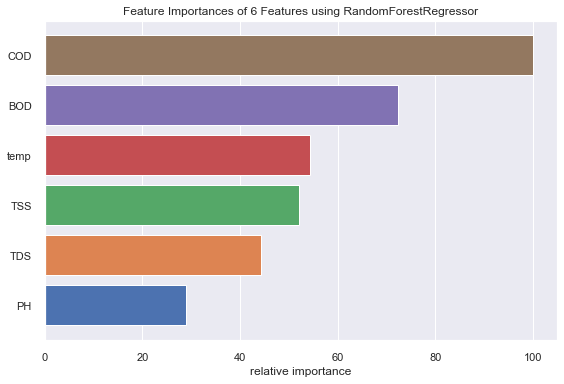

<AxesSubplot:title={'center':'Feature Importances of 6 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [135]:
from yellowbrick.model_selection import FeatureImportances
model=reg2
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

<AxesSubplot:>

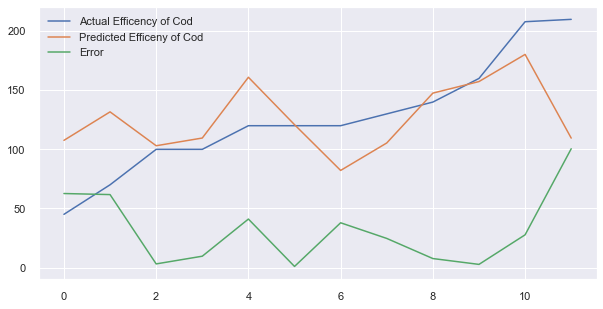

In [136]:
Result.plot(x=Result.index.name, y=['Actual Efficency of Cod','Predicted Efficeny of Cod','Error'],figsize=(10,5), grid=True  )

In [137]:
y_test

97    120.0
52    208.0
49    210.0
90    120.0
88    130.0
62     45.0
75    100.0
67    100.0
14    140.0
26    160.0
64    120.0
36     70.0
Name: COD_, dtype: float64

In [138]:
from sklearn.metrics import mean_squared_error ,r2_score
MSE= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
RMSE=mean_squared_error(y_test,y_pred)**0.5
AAD= np.sum(((y_pred-y_test)/y_pred)/len(y_test))*100
print('--------------------------------')
print('COD Results')
print('MSE :', MSE)
print('R2 :',r2)
print('RMSE :', RMSE)
print('AAD% :',AAD)

--------------------------------
COD Results
MSE : 1873.1169333333335
R2 : 0.14518066419681874
RMSE : 43.27952094620888
AAD% : -2.511259613469959
